# Module 7: Crash Course in Linear Algebra

CSCI 1360: Foundations for Informatics and Analytics

## Overview and Objectives

Technically, linear algebra is the space of mathematics that deals with vector spaces. Colloquially, linear algebra involves the manipulations of variables with many, many dimensions. It's a tricky business but absolutely essential to any data scientist. By the end of this lecture, you should be able to 

 - Define vectors and matrices and their basic arithmetic operations
 - Use arrays as vector and matrix abstractions to perform computations in Python
 - Understand the elementary theory behind the words "space" and "dimension" in the context of linear algebra

## Introduction

It bears mentioning: if your chosen field is data science in some form, **you will use linear algebra on a daily basis. Period.** There is no escaping it.

There's enough to linear algebra for it to consume entire courses, so we can't possibly do it justice in one lecture. So I **strongly recommend** taking a linear algebra course as early as possible.

## Part 1: Terminology

There's a lot of jargon associated with linear algebra. We'll touch on some of the basic terms. Head over to the [Wikipedia Linear Algebra page for similar information](https://en.wikipedia.org/wiki/Linear_algebra).

For starters: use two dimensions ($x$ and $y$ values) and three dimensions ($x$, $y$, and $z$ values) as references to anchor your understanding. When we refer to "lines" and "planes", think about what they look like in these contexts.

(also: a *plane* is a *line*, but in 3 dimensions)

To a certain extent, linear algebra is a *generalization* of the 2D (and 3D?) Cartesian plotting you've already done before now. We're "just" considering lines that can have arbitrary numbers of variables, instead of just two ($x$ and $y$).

### Scalars

A **scalar** is a number. You've seen many of them and will see many more. Just a number. Hooray!

Scalars can come with or without units. So long as it's just one number...

In [ ]:
x = 5 # scalar
y = 4924.2352353 # scalar
z = (1, 2, 3)  # NOT a scalar!

...it's a scalar.

### Vectors

A **vector** is a collection of scalars that describe some object. Think of a vector as a generalized scalar: whereas one's velocity can be measured with a single number (55mph), one's physical position on a baseball field needs at least two numbers ($x$ and $y$).

This is a picture of a two-dimensional vector and its opposite:

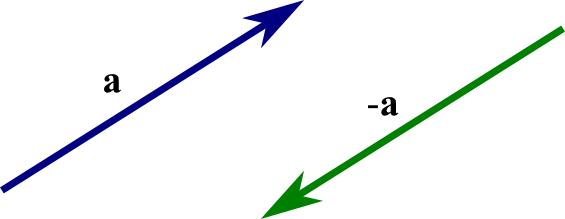

Vectors in linear algebra are pretty much your bread-and-butter. These are your data points, your observations, your model descriptors, and the cornerstone of any algorithm you may implement.

It can be helpful to think of vectors and arrays as interchangeable, since both have some finite number of *elements*. For vectors, these elements are always *scalars*.

The number of elements in a vector is the number of **dimensions**. Vectors with three elements

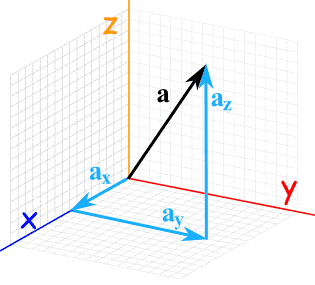

are three-dimensional.

Vectors have two very important properties that ultimately distinguish them from scalars:

 - *Magnitude*. Scalars also have magnitude; it's their absolute value. Vectors' magnitude is the length of the vector (not the `len()` kind of length--as we just said in the last slide, the number of elements, which is what `len()` measures, is the number of *dimensions*), or in some sense how "strong" the vector is.

 - *Direction*. Scalars have no concept of direction whatsoever. Vectors, however, point in a specific direction.

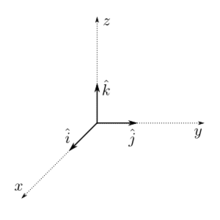

These vectors are three-dimensional, have equal magnitude (they're the same length), but different directions.

Computing the direction of the vector is easy: it's just the vector itself. In 2D or 3D, you can map a vector by starting at the origin and drawing a line toward the point indicated by the elements of the vector.
 - The 2D vector (5, 5) starts at the origin and points up and to the right at a 45 degree angle.
 - The vector (5, 0) starts at the origin and points to the right along the $x$-axis.

Computing the magnitude is a little trickier, but not much. After all, if you drew the point (5, 5) and the line connecting it to the origin (0, 0), how would you compute that distance between those two points?

In [1]:
import numpy as np
vector = np.array([5, 5])  # Here's our example vector.

In [2]:
magnitude = np.sqrt( (vector[0] ** 2) + (vector[1] ** 2) )
print("Magnitude: {:.2f}".format(magnitude))

Magnitude: 7.07


More generally: for each element in a vector, compute its square. Sum up all the squares, and take the square root of that sum.

2D: magnitude = $\sqrt{x^2 + y^2}$

3D: magnitude = $\sqrt{x^2 + y^2 + z^2}$

You can then generalize to $n$-dimensions (yes, that's a thing) by continuing to add squared terms inside the square-root.

Pythagorus was on a roll!

### Spaces

A **space** (usually referred to as a *vector space*) can, abstractly, be thought of as a sort of "enclosure" of possibilities, which occasionally takes physical form as vectors.

Spaces are (usually) infinite in size, but *finite* in dimension. Take a two-dimensional space: only two dimensions ($x$ and $y$), but you can imagine these two dimensions ranging from $-\infty$ to $+\infty$, thereby making the two-dimensional space infinite.

Spaces are the culmination of many vectors; vectors *live* in a space, and vectors can *define* a space. One common activity for data scientists and researchers is to compute vectors that define, or at least approximate, some space of interest.

Some other possibly-unhelpful analogies might include:

 - If you're into quantum multiverses, consider a "space" as one possible universe.

 - If you're interested in any of the life sciences, consider a "space" to be one particular unit of measure.

 - If you're a student of psychology, consider a "space" as an arbitrary individual's self-schema.

 - If you prefer a modern philosophical slant, consider a "space" as an existential reality.

In essence, a "space" is a **potentially-infinite realm of possibility** in which we typically observe a finite (and often very small, relatively speaking) number of vectors that happen to originate and live within that space.

But even though the space itself is infinite, **we can often do a decently good job of describing its shape, size, contours, and general structure with a relatively small number of well-chosen vectors from that space**.

Same with quantum multiverses, and trying to distinguish one from another: there are a theoretically-infinite number of alternate universes, but you probably don't need to store the entire universe on a hard drive in order to differentiate it from another. You could probably devise a much simpler representation that still adequately captures the full universe to a certain degree.

So it is with spaces: you will (almost) always begin every data science problem with the assumption that your data live in some *space*. Even though the space is likely infinite, your data (you assume) provide a fairly reasonable approximation of the characteristics of that space--at least, reasonable enough for you to conduct some analytics.

I hope I've beaten this dead horse to your satisfaction. If you're still confused, I wouldn't blame you, so please ask questions.

## Part 2: Systems of Equations Perspective

There are a lot of applications of linear algebra, but the one most likely to resonate with the majority of you is using linear algebra to solve systems of equations.

I'm sure you've seen the following *ad nauseum* since middle school:

`Find x.`

$y = 2x + 5$

(no, don't draw an arrow to the $x$ with the caption "there it is!")

Systems of equations are sets of multiple such equations that involve the same variables.

$$
0.45x + 0.65y = 18.55 \\
x + y = 35
$$

As you may recall, you need at least as many equations as you have unique variables in order to solve\* a system of equations. In this case: two variables, $x$ and $y$, and two equations.

\* (even then, there may not be a solution, but at least there's the possibility of a solution)

How does one solve a system of equations? There are a handful of strategies.

**1: Substitution.** Solve for one of the variables in one equation, and plug that into the second equation.

 - Set $x$ in terms of $y$ in the second equation: $x = 35 - y$

 - Replace $x$ with $35 - y$ in the first equation: $0.45(35 - y) + 0.65y = 18.55$

 - Solve for $y$: $y = 14$

 - Plug the value for $y$ into the second equation and solve for $x$: $x = 35 - 14 = 21$

**2: Elimination.** Rewrite the two equations in such a way that when you add them together, a variable is eliminated entirely. Then substitute the remaining variable.

 - Multiply the second equation by $-0.65$: $-0.65x - 0.65y = -22.75$

 - Add the first equation and the second modified equation together: $-0.2x = -4.2$. Solving for $x$, you get $x = 21$.

 - Plug $x = 21$ into either of the equations and solve for $y$: $y = 14$

### Putting the "linear" in "linear algebra"

You may have noticed a few things about the previous equations:

 - No exponentiated variables, and
 - None of the variables (meaning $x$ and $y$) are multiplying or dividing each other

This is where the *linear* aspect of linear algebra comes from. [This Math StackExchange answer](http://math.stackexchange.com/a/62791/185146) does a great job of summarizing linear algebra from a high level, the key bit being:

    "Linear algebra is so named because it studies linear functions. [...] Roughly, this means that inputs are proportional to outputs and that the function is additive. We get the name 'linear' from the prototypical example of a linear function in one dimension: a straight line through the origin."

An important caveat to keep in mind: while you will represent the vast majority of your data as systems of linear equations, **do not fool yourself into thinking this is a 100% accurate representation**.

Linear algebra is a way of [modeling, or representing, things](https://en.wikipedia.org/wiki/All_models_are_wrong). But it has limitations, the biggest one being that *everything is a line*. You can't explicitly model complex (or *nonlinear*) dependencies between variables.

Of course the benefit of using linear models is that they're (relatively) simple. Need to take a derivative of an equation? Oh, it's just a line? Poof! Need to integrate an equation? Again, just a line? Poof ($+C$)!

By essentially reducing everything down to [Taylor polynomials](https://en.wikipedia.org/wiki/Taylor_series), it becomes very easy to manipulate the equations on a large scale, at the cost of some precision. Exactly how much precision depends on the system, and as data scientists it will be **up to you** to figure out whether or not the trade-off is worthwhile!

### Perspective

Substitution and elimination work well, but can you imagine doing this sort of thing for systems that involve hundreds of variables and thousands of equations?

And if you do go into data science...that's an optimistic scenario. Quite often, you deal with *hundreds of thousands* of variables, and *millions* to *billions* of equations.

Enter **vectors** and **matrices**!

A linear function can be learned to distinguish between samples based on their features. For example, samples with 2D vectors.

$y = 6 - x$

A non-linear function can add more complexcity to the clustering operation.

$y = 6 - x^2$

## Part 3: Vectors and Matrices

Think of a **vector** as an array of the coefficients for an equation.

$x + y = 35$

The corresponding vector for this equation would be: `[1, 1]` (those are the coefficients of $x$ and $y$).

$0.45x + 0.65y = 18.55$

The corresponding vector for this equation would be: `[0.45, 0.65]`

A **matrix**, then, is just a bunch of vectors stacked up on top of each other. Stack our two vectors we made from the two equations, and we get

$$
A = \begin{bmatrix}
1 & 1 \\
0.45 & 0.65
\end{bmatrix}
$$

Then, of course, we have our vector of variables: $\vec{x} = [x, y]$

And our solution vector: $\vec{y} = [35, 18.55]$ (the numbers on the right-hand side of the two equations)

Which, at last, gives us our *linear equation*!

$$
A\vec{x} = \vec{y}
$$

### $A\vec{x} = \vec{y}$

This form of the system is ubiquitous in linear algebra, and you're almost always interested in solving for the variables $\vec{x}$.

Most of your job as data scientists will consist of actually setting up this system; that's far and away the hardest part. Once you have the system in this form, there are quite a few cool ways of solving it, some of which we'll touch on.

But figuring out *how* to set up the system is non-trivial. What variables are important enough to include? As an example:

I want to predict tomorrow's weather: rainy, sunny, cloudy, or windy. These would be our *targets* in $\vec{y}$, the things on the right-hand side of the equation.

What variables would be good predictors of weather? Today's temperature would probably be a good place to start. The current season as well. Maybe also whether *today* was rainy, sunny, cloudy, or windy. Probably the last weeks' worth of all that data, too. Maybe historical data from previous years as well?

...and we've already hit hundreds of variables. The equations themselves are our observations: previous data points we have where we can fill in values for all these variables and for which we already know the weather (this is called **training data**).

There's no hard-and-fast system for choosing what variables to consider, and how many equations to include. In the era of "big data", the general strategy is to include as many equations (observations, data points) as possible.

Variables are a little trickier. Some may help more than others; some may be *correlated* with each other, which can potentially result in perniciously misleading statistical properties. Some may send you in the wrong direction--which can be helpful if you realize you're heading in the opposite direction!

### tl;dr

This is all to say that actually setting up the linear system is going to be your biggest challenge as data scientists, and knowing the basics of linear algebra will be crucial to your success.

## Review Questions

Some questions to discuss and consider:

1: Starting from the linear equation $A\vec{x} = \vec{y}$, can you perform the $A\vec{x}$ multiplication (matrix-vector) by hand? If you need a refresher, please ask.

2: Write out the coefficient vector $\vec{x}$ for the equation: $-0.5x_1 + 13x_2 - 65.2x_3 = 20$

## Additional Resources

 1. Grus, Joel. *Data Science from Scratch*. 2015. ISBN-13: 978-1491901427
 2. Linear Algebra cheat sheet (a little advanced but with tons of great info) https://medium.com/towards-data-science/linear-algebra-cheat-sheet-for-deep-learning-cd67aba4526c
 